In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1月から12月までのデータを読み込んで結合しdfに格納
df = pd.DataFrame()
for i in range(1, 13):
    df_tmp = pd.read_csv(f"../data_collection/data/2020-{i:02}.csv", encoding="utf8")
    df = pd.concat([df, df_tmp], ignore_index=True)
df.head()

,likes_count,title,body,created_date,created_time,tags,followers_count,organization,items_count
0,1.0,品質担保に本気で取り組んでみている話,株式会社オズビジョンの @terra_yucco です。2020/01 現在、オズビジョン ...,2020-01-31,23:59:59,"['仕様', '品質管理', '品質', 'QCD']",43.0,OZvision Inc.,97.0
1,5.0,【Unity】Screen.safeAreaとiOSステータスバーの罠（？）,# Unityで取得できる Screen.safeAreaには罠（？）がある罠に遭遇したのは...,2020-01-31,23:56:36,"['iOS', 'Unity', 'SafeArea']",2.0,NaN,7.0
2,3.0,徹底攻略！“SATySFiのロゴ”の出し方,**SATySFiのロゴ**といえば、もちろんコレですね。![image-1a.png](h...,2020-01-31,23:54:15,['SATySFi'],157.0,NaN,65.0
3,0.0,【KPI】家系図テーブルの操作 1【oracle】,某炎の紋章の家系図見てて、TRPGなどに使えるかなと思って家系図テーブルの運用を考える。階層...,2020-01-31,23:50:44,['oracle'],1.0,NaN,10.0
4,0.0,プログラミング・フォロを組み立てる,#プログラミング・フォロmicro:bitを内蔵して６本足で自律して歩き回ることの出来る [...,2020-01-31,23:45:47,"['RaspberryPi', 'microbit']",3.0,NaN,11.0


In [3]:
# dfの各カラムのデータ型を確認
df.dtypes

likes_count        float64
title               object
body                object
created_date        object
created_time        object
tags                object
followers_count    float64
organization        object
items_count        float64
dtype: object

In [4]:
# dfの各カラムの欠損値の数を確認
df.isnull().sum()

likes_count             1
title                   0
body                    1
created_date            1
created_time            1
tags                    1
followers_count         2
organization       110525
items_count             2
dtype: int64

In [5]:
# organizationに値が入っていればTrue、欠損していればFalseに置き換える
df["organization"] = df["organization"].notnull()
df.head()

,likes_count,title,body,created_date,created_time,tags,followers_count,organization,items_count
0,1.0,品質担保に本気で取り組んでみている話,株式会社オズビジョンの @terra_yucco です。2020/01 現在、オズビジョン ...,2020-01-31,23:59:59,"['仕様', '品質管理', '品質', 'QCD']",43.0,True,97.0
1,5.0,【Unity】Screen.safeAreaとiOSステータスバーの罠（？）,# Unityで取得できる Screen.safeAreaには罠（？）がある罠に遭遇したのは...,2020-01-31,23:56:36,"['iOS', 'Unity', 'SafeArea']",2.0,False,7.0
2,3.0,徹底攻略！“SATySFiのロゴ”の出し方,**SATySFiのロゴ**といえば、もちろんコレですね。![image-1a.png](h...,2020-01-31,23:54:15,['SATySFi'],157.0,False,65.0
3,0.0,【KPI】家系図テーブルの操作 1【oracle】,某炎の紋章の家系図見てて、TRPGなどに使えるかなと思って家系図テーブルの運用を考える。階層...,2020-01-31,23:50:44,['oracle'],1.0,False,10.0
4,0.0,プログラミング・フォロを組み立てる,#プログラミング・フォロmicro:bitを内蔵して６本足で自律して歩き回ることの出来る [...,2020-01-31,23:45:47,"['RaspberryPi', 'microbit']",3.0,False,11.0


In [6]:
# likes_countの値が1000以上の行を抽出
df[df["likes_count"] >= 1000].head()

,likes_count,title,body,created_date,created_time,tags,followers_count,organization,items_count
749,1386.0,Vue開発者のためのVue.jsベストプラクティス集15選,# はじめに**みなさん、Vue使ってますかー！**・・・・・・・（へんじがない。ただのしか...,2020-01-29,23:00:56,"['JavaScript', 'Vue.js', 'Nuxt']",131.0,False,15.0
1008,1523.0,Vue.jsで作成された、ちょっと面白くて役立ちそうなサービス,## [こちらに移行しました。(2020/05/16)](https://tech-blog...,2020-01-29,08:43:49,"['JavaScript', 'Bootstrap', 'ツール', 'Vue.js', '...",35.0,False,19.0
1459,1024.0,FFT（高速フーリエ変換）を完全に理解する話,"FFT(Fast Fourier Transform),高速フーリエ変換についての記事です。...",2020-01-27,22:00:06,"['アルゴリズム', 'math', 'AtCoder', '競技プログラミング']",163.0,False,28.0
3500,1062.0,2020年現在 Web系企業で採用されてる技術についてまとめてみた,# はじめに2020年も始まりましたね！タイトル通りですが、2020年現在スタートアップや大...,2020-01-22,10:43:23,"['初心者', 'ツール', 'まとめ', '初心者向け', 'プログラミング言語']",24.0,False,27.0
3868,4834.0,良いコードの書き方,# 概要チームによる継続的開発を前提としたコーディングのガイドライン。特定の言語を対象とした...,2020-01-21,10:50:39,"['Java', 'プログラミング', 'コーディング規約', 'チーム開発', 'Swift']",128.0,True,29.0


In [7]:
# likes_countの値が1000以上なら1000に置き換える
df.loc[df["likes_count"] >= 1000, "likes_count"] = 1000
df[df["likes_count"] >= 1000].head()

,likes_count,title,body,created_date,created_time,tags,followers_count,organization,items_count
749,1000.0,Vue開発者のためのVue.jsベストプラクティス集15選,# はじめに**みなさん、Vue使ってますかー！**・・・・・・・（へんじがない。ただのしか...,2020-01-29,23:00:56,"['JavaScript', 'Vue.js', 'Nuxt']",131.0,False,15.0
1008,1000.0,Vue.jsで作成された、ちょっと面白くて役立ちそうなサービス,## [こちらに移行しました。(2020/05/16)](https://tech-blog...,2020-01-29,08:43:49,"['JavaScript', 'Bootstrap', 'ツール', 'Vue.js', '...",35.0,False,19.0
1459,1000.0,FFT（高速フーリエ変換）を完全に理解する話,"FFT(Fast Fourier Transform),高速フーリエ変換についての記事です。...",2020-01-27,22:00:06,"['アルゴリズム', 'math', 'AtCoder', '競技プログラミング']",163.0,False,28.0
3500,1000.0,2020年現在 Web系企業で採用されてる技術についてまとめてみた,# はじめに2020年も始まりましたね！タイトル通りですが、2020年現在スタートアップや大...,2020-01-22,10:43:23,"['初心者', 'ツール', 'まとめ', '初心者向け', 'プログラミング言語']",24.0,False,27.0
3868,1000.0,良いコードの書き方,# 概要チームによる継続的開発を前提としたコーディングのガイドライン。特定の言語を対象とした...,2020-01-21,10:50:39,"['Java', 'プログラミング', 'コーディング規約', 'チーム開発', 'Swift']",128.0,True,29.0


In [8]:
# likes_count以外のカラムを結合する
df["concat"] = df["title"] + df["body"] + df["created_date"] + df["created_time"] + df["tags"] + df["followers_count"].astype(str) + df["organization"].astype(str) + df["items_count"].astype(str)
df = df[["likes_count", "concat"]]
df.head()

,likes_count,concat
0,1.0,品質担保に本気で取り組んでみている話株式会社オズビジョンの @terra_yucco です。...
1,5.0,【Unity】Screen.safeAreaとiOSステータスバーの罠（？）# Unityで...
2,3.0,徹底攻略！“SATySFiのロゴ”の出し方**SATySFiのロゴ**といえば、もちろんコレ...
3,0.0,【KPI】家系図テーブルの操作 1【oracle】某炎の紋章の家系図見てて、TRPGなどに使...
4,0.0,プログラミング・フォロを組み立てる#プログラミング・フォロmicro:bitを内蔵して６本足...


In [10]:
# 欠損値を含む行を削除
df = df.dropna()

In [11]:
# TF-IDFを計算する
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
concat_tfidf = tfidf.fit_transform(df["concat"])

In [12]:
# 次元削減
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50)
concat_svd = svd.fit_transform(concat_tfidf)
concat_svd

array([[ 0.00755918,  0.00025031,  0.00649784, ..., -0.00334508,
         0.00381079, -0.00142883],
       [ 0.03758652, -0.00330643,  0.0075937 , ...,  0.00615182,
        -0.00715834,  0.0035343 ],
       [ 0.15294273, -0.04374212, -0.02790096, ...,  0.00692461,
         0.00367898,  0.00201869],
       ...,
       [ 0.16816063, -0.04128189, -0.04476936, ..., -0.0204635 ,
         0.00334466,  0.00775729],
       [ 0.03546913,  0.01210347,  0.07013043, ...,  0.01924044,
        -0.00662072, -0.01167341],
       [ 0.04915796,  0.00576276,  0.09348974, ...,  0.05148813,
         0.08165139, -0.03179878]])

In [13]:
print(concat_tfidf.shape)
print(concat_svd.shape)

(140801, 10228682)
(140801, 50)


In [14]:
# 元のデータフレームに結合
num = concat_svd.shape[1]
text_df = pd.DataFrame(concat_svd, columns=[str(i) for i in range(num)])

df = pd.concat([df, text_df], axis=1)
df = df.drop(["concat"], axis=1)
df.head()

,likes_count,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,1.0,0.007559,0.000250,0.006498,0.003636,0.004380,0.000237,0.015388,-0.006884,-0.004635,...,0.001574,-0.003621,0.000006,-0.001979,-0.002936,-0.002101,-0.001052,-0.003345,0.003811,-0.001429
1,5.0,0.037587,-0.003306,0.007594,-0.000897,0.006629,0.000846,0.001402,-0.007425,0.002425,...,0.017515,0.000847,-0.006249,-0.000038,0.004122,-0.008430,-0.006429,0.006152,-0.007158,0.003534
2,3.0,0.152943,-0.043742,-0.027901,-0.024401,-0.008988,-0.011716,-0.025445,0.014016,-0.012259,...,0.021599,0.003542,0.006206,-0.016276,-0.013011,0.013169,0.004292,0.006925,0.003679,0.002019
3,0.0,0.069294,0.001117,0.085406,-0.009175,0.046392,-0.028578,0.009156,-0.000973,-0.011162,...,-0.013572,-0.041984,-0.003946,0.007480,-0.005946,0.035918,0.022961,0.039860,0.048317,-0.012163
4,0.0,0.172528,-0.052621,-0.062155,0.003589,0.003716,-0.003679,0.001280,0.001739,0.002249,...,0.002610,0.001277,0.013032,0.020717,-0.033260,-0.007939,0.015427,-0.016577,0.002386,0.018845


In [15]:
# 欠損値がある行を削除
df = df.dropna()

In [16]:
# 欠損値がある行が削除されたことを確認
df.isnull().sum()

likes_count    0
0              0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             0
15             0
16             0
17             0
18             0
19             0
20             0
21             0
22             0
23             0
24             0
25             0
26             0
27             0
28             0
29             0
30             0
31             0
32             0
33             0
34             0
35             0
36             0
37             0
38             0
39             0
40             0
41             0
42             0
43             0
44             0
45             0
46             0
47             0
48             0
49             0
dtype: int64

In [17]:
# trainとtestに分割する(likes_countを目的変数とする)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=0)
train_y = train["likes_count"]
train_X = train.drop(["likes_count"], axis=1)
test_y = test["likes_count"]
test_X = test.drop(["likes_count"], axis=1)

In [18]:
# LGBMでモデルの学習
import lightgbm as lgb
model = lgb.LGBMRegressor()
model.fit(train_X, train_y)

# テストデータの予測
y_pred = model.predict(test_X)

In [19]:
# 平均絶対誤差を計算
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, y_pred)

11.592640813345689

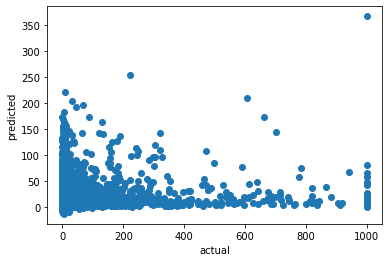

In [20]:
# 散布図を描画
plt.scatter(test_y, y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [21]:
# y_predの値が負なら0に置き換える
y_pred[y_pred < 0] = 0
# 平均絶対誤差を計算
mean_absolute_error(test_y, y_pred)

11.585637589304339